In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import sklearn
from sklearn.decomposition import TruncatedSVD
import joblib

In [6]:
product_descriptions = pd.read_csv('data/product_descriptions/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [9]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

In [10]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [13]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

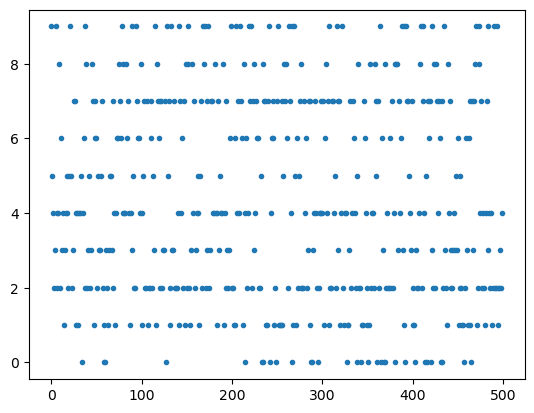

In [39]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++', n_init = 1)
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [44]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [45]:
true_k = 20

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 bronze
 rubbed
 popcorn
 mounting
 collection
 lifetime
 features
 ltx
 clean
 switch
Cluster 1:
 ft
 10
 landscape
 patio
 easy
 pallet
 gardens
 use
 sq
 ground
Cluster 2:
 tool
 work
 battery
 lithium
 free
 m12
 ion
 volt
 light
 power
Cluster 3:
 metal
 drill
 hex
 cooling
 heating
 point
 gauge
 fastening
 radiant
 thicker
Cluster 4:
 light
 fan
 ceiling
 nickel
 brushed
 hampton
 watt
 bulbs
 bay
 help
Cluster 5:
 water
 toilet
 flush
 heater
 tank
 watt
 gal
 easy
 bowl
 design
Cluster 6:
 concrete
 stake
 sprinkler
 head
 help
 ants
 used
 rebar
 drying
 product
Cluster 7:
 storage
 shelves
 cabinet
 wall
 room
 laminate
 easy
 adjustable
 finish
 garage
Cluster 8:
 wall
 painted
 moulding
 home
 post
 ft
 used
 plate
 base
 proposition
Cluster 9:
 frame
 patio
 dining
 collection
 cushions
 steel
 wicker
 rust
 outdoor
 fabric
Cluster 10:
 cycle
 wash
 energy
 drum
 dryer
 clothes
 dry
 ft
 hand
 porcelain
Cluster 11:
 piece
 tile
 recommend

In [46]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print(prediction)
    print_cluster(prediction[0])

In [48]:
show_recommendations("cutting tool")

[14]
Cluster 14:
 cutting
 blade
 tree
 pruner
 saw
 pole
 blades
 mower
 pruning
 steel


In [51]:
def predictAll(data):
    predictedClasses={0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8:[], 9:[], 10: [],11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18:[], 19:[]}
    for i in data.name:
        Y = vectorizer.transform([i])
        predictedClasses[model.predict(Y)[0]].append(i)
    return predictedClasses

In [53]:
products = pd.read_csv('data/train/train.csv',names = ['id','lilakhra','name','chi7aja'], encoding="ISO-8859-1")
predictAll(products[:1000])

{0: ['cub cadet 42',
  'bathroom hardware knobs and pulls',
  'bathroom  pedelal sink',
  'under the bathroom sink'],
 1: ['flexlock for cracks',
  '12 boltless bracket',
  'cadet 3 insulated in bone',
  'fece posts metal',
  'wire fencing 6 ft high',
  'bolt 1/2 in by 12',
  'elastomeric roof coating',
  'R 15',
  'TILES 12*12',
  "plexiglas 18' x 24'",
  'ge adora range',
  'plants moses in a cradle',
  'landscape edging',
  'fiberglass repir kit',
  'pine straw',
  'face masks',
  'ant killer',
  'plastic covers',
  '24 stainless gas range',
  'fiberglass repir kit',
  'foil board',
  '2x4 board',
  'paver stones',
  'fiberglass repir kit',
  '1/4 WonderBoard',
  'roll roofing lap cemet',
  'rolled roofing',
  'tub materials sheets',
  'cedart board',
  'whirlpool washer 12 inch pedestal',
  'weeds spray',
  'roll roofing lap cemet',
  '3-way electrical sockets',
  '24  bathroom vanities',
  '24 inch vanities',
  'antenna pole',
  'coating sealer for stone floor',
  'pool suppll',
 

In [ ]:
# Save the model and vectorizer
joblib.dump(model, 'kmeans_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')